# Publish Data In Bulk

In [1]:
import os
import logging
log = logging.getLogger()

from IPython.display import display, HTML

from arcgis.gis import GIS

gis = GIS(username="DavidJVitale")

Enter password: ········


In [2]:
publish_data_dir_root = os.path.join(".","files_to_publish")
print(os.listdir(publish_data_dir_root))

['.DS_Store', 'shapefiles', 'portal_sd_items']


In [3]:
def get_absolute_file_paths(directory):
    for dirpath, _ ,filenames in os.walk(directory):
        for f in filenames:
            yield os.path.abspath(os.path.join(dirpath, f))

In [4]:
group = gis.groups.get('3ebcef3b10744de3b3726e98c6cbc0c9')
group

<Group title:"uc2019 bulk publish example" owner:DavidJVitale>

Run the below cell to publish all zipped shapefiles in the `files_to_publish` dir:

In [5]:
shapefile_dir = os.path.join(publish_data_dir_root, "shapefiles")

for shapefile_path in get_absolute_file_paths(shapefile_dir):
    print(f"Shapefile {shapefile_path}...")

Shapefile /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/SwimmingPools180605b.zip...
Shapefile /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/community_college_district_2.zip...
Shapefile /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/restaurants_pittsburgh.zip...
Shapefile /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/chennai_relief_centers.zip...
Shapefile /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/Commercial_Permits_since_2010.zip...
Shapefile /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/ALS_Clinics_CA.zip...


Attempting to publishing /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/SwimmingPools180605b.zip...


<Item title:"SwimmingPools180605b" type:Feature Layer Collection owner:DavidJVitale>

Attempting to publishing /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/community_college_district_2.zip...


<Item title:"community_college_district_2" type:Feature Layer Collection owner:DavidJVitale>

Attempting to publishing /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/restaurants_pittsburgh.zip...


<Item title:"restaurants_pittsburgh" type:Feature Layer Collection owner:DavidJVitale>
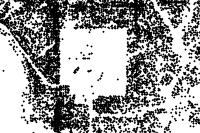

Attempting to publishing /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/chennai_relief_centers.zip...


<Item title:"chennai_relief_centers" type:Feature Layer Collection owner:DavidJVitale>

Attempting to publishing /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/Commercial_Permits_since_2010.zip...


Could not publish /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/Commercial_Permits_since_2010.zip. Exception thrown: 'error'


Attempting to publishing /Users/davi9349/devel/arcfork/talks/uc2019/migrating_content/files_to_publish/shapefiles/ALS_Clinics_CA.zip...


<Item title:"ALS_Clinics_CA" type:Feature Layer Collection owner:DavidJVitale>

In [6]:
shapefile_dir = os.path.join(publish_data_dir_root, "shapefiles")

for shapefile_path in get_absolute_file_paths(shapefile_dir):
    print(f"Attempting to publishing {shapefile_path}...")
    try:
        item = gis.content.add({}, shapefile_path)
        published_item = item.publish()
        published_item.share(groups=[group,])
        display(published_item)
    except Exception as e:
        log.warning(f"Could not publish {shapefile_path}. "\
                    f"Exception thrown: {e}")

Run the below cell to publish all Portal `.sd` files in the `files_to_publish` dir:

<Item title:"Chennai_Solid_Waste_Management" type:Feature Layer Collection owner:DavidJVitale>
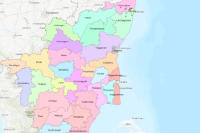

In [8]:
portal_sd_file_dir = os.path.join(publish_data_dir_root,
                                  "portal_sd_items")

for portal_sd_path in get_absolute_file_paths(portal_sd_file_dir):
    try:
        item = gis.content.add({}, portal_sd_path)
        published_item = item.publish()
        published_item.share(everyone=True)
        display(published_item)
    except Exception as e:
        log.warning(f"Could not publish {shapefile_path}."\
                    f"Exception thrown: {e}")